1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


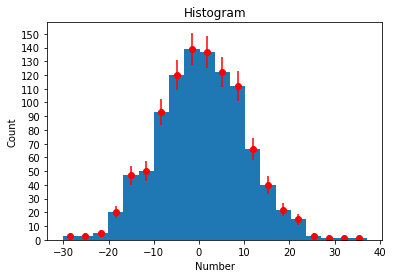

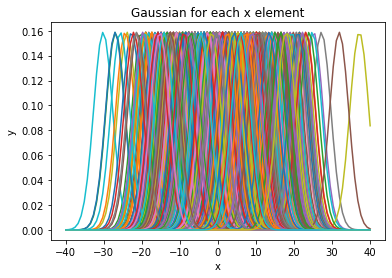

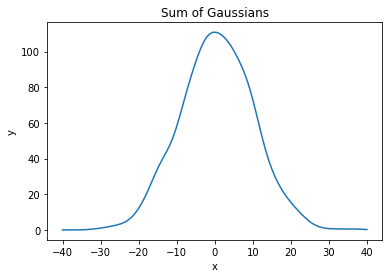

The integral of first shape is 3360.6363007787722 and the integral after normalization is 3360.751141738958 and 
we see they are equal


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import trapz
import random 

random.seed(23234)

mu = 0
sigma = 10
x= np.array(np.random.normal(mu, sigma, 1000))

plt.yticks(range(0,160,10))
plt.xlabel('Number')
plt.ylabel('Count')

# calculate bin centers
y,edges,_=plt.hist(x,bins=20)
bin_centers = 0.5 * (edges[:-1] + edges[1:])
plt.errorbar(bin_centers, y, yerr=y**(1/2), fmt='o',color='r', ecolor='r')
plt.title("Histogram")
plt.figure()

x_domain=np.linspace(-40,40,100)
# plt.xlim(-35,35)

Y = np.array([norm.pdf(x_domain, loc= i, scale= 1.06* x.std() * x.size**(-1/5)) for i in x])

for j in range(Y.shape[0]): plt.plot(x_domain,Y[j])
plt.title("Gaussian for each x element")
plt.xlabel("x")
plt.ylabel("y")
plt.figure()

integral = trapz(y,dx=edges[1]-edges[0])
Normalized_Y = integral*(np.sum(Y, axis = 0))/(trapz(np.sum(Y, axis=0)))

plt.plot(x_domain, Normalized_Y)
plt.title("Sum of Gaussians")
plt.xlabel("x")
plt.ylabel("y")
normalized_integral = np.sum(integral*(np.sum(Y, axis = 0))/(trapz(np.sum(Y, axis=0))))
plt.show()
print("The integral of first shape is {} and the integral after normalization is {} and \nwe see they are equal".format(integral,np.sum(Normalized_Y)))

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

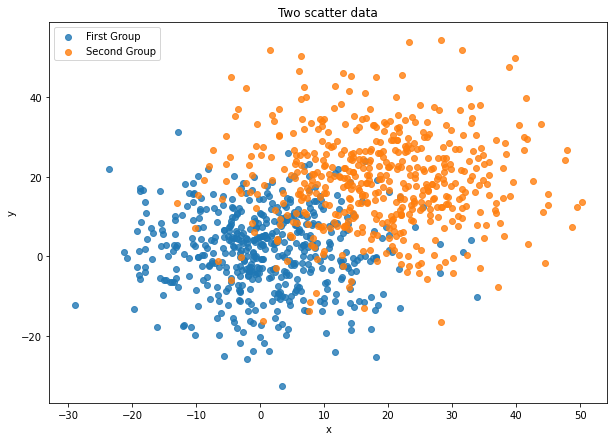

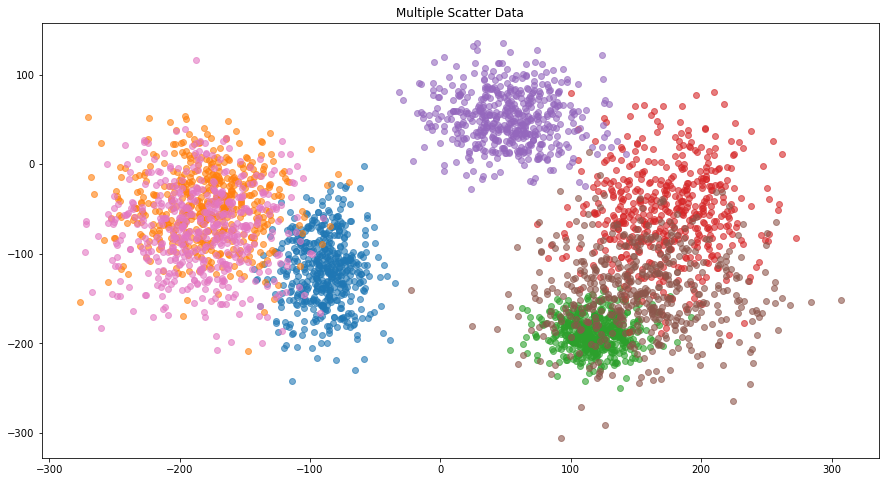

In [2]:
import random 
random.seed(2323434)

def Scatter(N, Center_1,Center_2, STD_1, STD_2):
    x_1 = np.random.normal(Center_1, STD_1, N)
    x_2 = np.random.normal(Center_2, STD_2, N)
    y_1 = np.random.normal(Center_1, STD_1, N)
    y_2 = np.random.normal(Center_2, STD_2, N)
    
    fig = plt.figure(figsize=(10, 7))
    plt.scatter(x_1,y_1, label = "First Group",alpha=0.8)
    plt.scatter(x_2,y_2, label = "Second Group",alpha=0.8)
    plt.title("Two scatter data")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    
Scatter(500,1,20,10,12)
plt.show()

#Now let's try a more general Way:

def General_Scatter(n,N):
    
    X=np.array([np.random.normal(random.uniform(-200,200),random.uniform(15,50),N) for i in range(n)])
    Y=np.array([np.random.normal(random.uniform(-200,200),random.uniform(15,50),N) for i in range(n)])
#     print(Y)
    fig = plt.figure(figsize=(15, 8))
    plt.title("Multiple Scatter Data")
    for j in range(n): 
        plt.scatter(X[j],Y[j],alpha=0.6)

General_Scatter(7,500)

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

The result for linear regression:
 LinregressResult(slope=0.0032597701220305835, intercept=-0.15432816763069473, rvalue=0.043403510522559086, pvalue=8.717037183576464e-06, stderr=0.0007327014008445789, intercept_stderr=0.008458951961471835)


C:\Users\Enkidu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-3-aefa52a47908>:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gf = gf[df['distances']<l + Bin_len]
<ipython-input-3-aefa52a47908>:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gf = gf[df['distances']<l + Bin_len]
<ipython-input-3-aefa52a47908>:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gf = gf[df['distances']<l + Bin_len]
<ipython-input-3-aefa52a47908>:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gf = gf[df['distances']<l + Bin_len]
<ipython-input-3-aefa52a47908>:25: UserWarning: Boolean Series key will b

<ErrorbarContainer object of 3 artists>

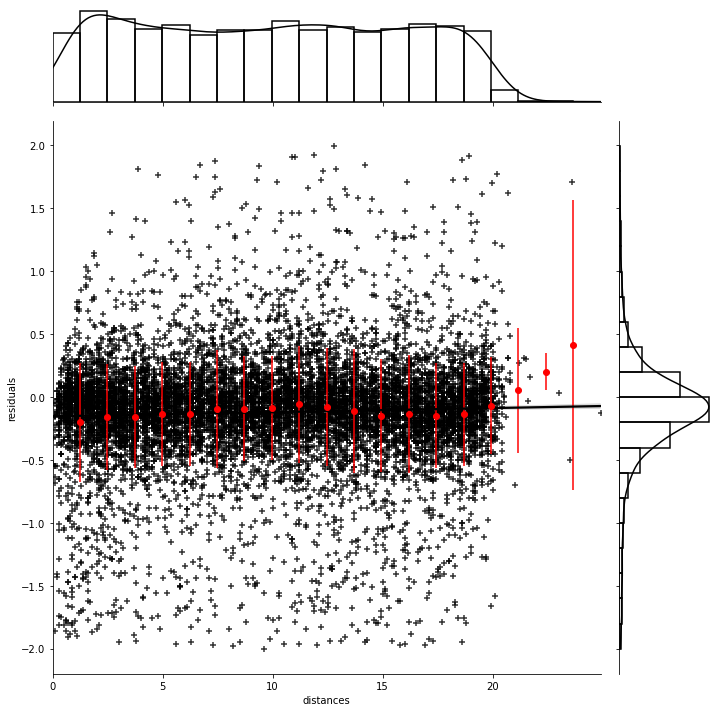

In [3]:
import pandas as pd
from scipy.stats import linregress as lg
import seaborn as sns


A= np.load("residuals_261.npy", allow_pickle=True)
df= pd.DataFrame(A.item())
df = df[np.abs(df['residuals']) < 2]
X, Y = df['distances'], df['residuals']
df= df.sort_values(by="distances")

print("The result for linear regression:\n", lg(X, Y))
graph = sns.jointplot(X, Y , data=df, kind="reg",height=10, marker="+",color='0', marginal_kws=dict(bins=20, fill=False))


Bin_len= (X.max() - X.min())/20
b=Bin_len
x=np.array([b + i * Bin_len for i in range(20)])
y= []
erry= []

l= 0
for i in range(20):
    gf = df[l<df['distances']]
    gf = gf[df['distances']<l + Bin_len]
    y.append(gf['residuals'].mean())
    erry.append(gf['residuals'].std())
    l+= Bin_len
    
y= np.array(y)
erry= np.array(erry)      

graph.ax_joint.errorbar(x, y, yerr=erry, fmt='o', c='r')